### AI-07 Quiz  

#### Import libraries  

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### Parameters  

In [34]:
csv_in = '../ai-05/iris.csv'

#### Read CSV file  

In [35]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=2, header=0)
print(df.shape)
print(df.info())
display(df.head())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_len    150 non-null    float64
 1   sepal_width  150 non-null    float64
 2   petal_len    150 non-null    float64
 3   petal_width  150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Separate data  

In [36]:
df_data = df.loc[:, ['petal_len', 'petal_width']]
print(df_data.shape)
display(df_data.head())
iris = df_data.index

(150, 2)


,petal_len,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


#### Using the elbow method to find the optimal number of clusters  

C:\Users\shugo\Miniconda3\envs\ds2021\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


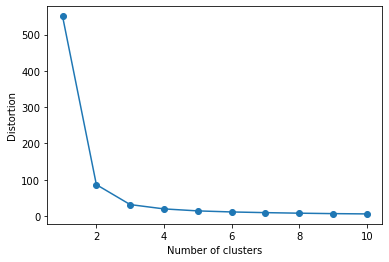

In [37]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(df_data)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

**Ans.1: 3 (2, 3, 4 are OK)**

#### Execute clustering  

In [38]:
n_cls = 3
km = KMeans(n_clusters=n_cls, random_state=11)
cls = km.fit_predict(df_data)

#### Draw scatter plot  

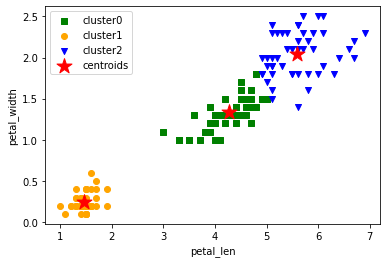

In [39]:
colors = ['green', 'orange', 'blue']
markers = ['s', 'o', 'v']
for i in range(n_cls):
    df_cls = df_data[ cls==i ]
    plt.scatter(df_cls['petal_len'], df_cls['petal_width'],
                c=colors[i], marker=markers[i],
                label='cluster{}'.format(i))
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*', c='red',
            label='centroids')
plt.xlabel('petal_len')
plt.ylabel('petal_width')
plt.legend()
plt.show()

#### Make cross table  

In [40]:
ct = pd.crosstab(df['class'], cls)
display(ct)

col_0,0,1,2
class,,,
Iris-setosa,0,50,0
Iris-versicolor,48,0,2
Iris-virginica,4,0,46


**Ans.2: 50**